# K12深度学习的数学知识点
1.张量、向量、矩阵概念：学习在PyTorch中生成随机二阶张量，即二维数组矩阵（矩阵伪数据）

2.矩阵相乘：python矩阵相乘运算符"@"     <br>   http://matrixmultiplication.xyz/

3.梯度下降，函数求导的概念

4.损失函数 loss function : 定义均方误差作为损失函数


5.Gradient Descent 梯度下降： PyTorch中梯度下降算法实施的细节<br>
**梯度下降** 是一个用于优化函数的算法。给定一个由一组参数决定的函数，梯度下降从一组初始的参数值开始，不断向能够最小化函数值的参数值迭代。这个迭代式最小化的结果是，通过向函数梯度的负方向不断递进而得到的。


# 随机梯度下降算法(SGD)

In [1]:
%matplotlib inline
from fastai.basics import *

在这部分，我们将会解释随机梯度下降算法(SGD)，它在神经网络应用中是常用的**优化**算法。我们将通过实例来解释其原理和概念。

##  Linear Regression problem 线性回归问题

线性回归的目标是将一条直线拟合到一组点。

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.3289,  1.0000],
        [ 0.3197,  1.0000],
        [ 0.6756,  1.0000],
        [-0.2778,  1.0000],
        [ 0.5566,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

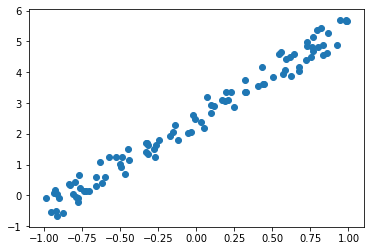

In [6]:
plt.scatter(x[:,0], y);

你希望找到这样的 **参数**（权重） `a`，使得数据点和直线`x@a`之间的 *误差* 尽可能小。需要注意的是这里`a`是未知的。对于回归问题最常用的 *误差函数* 或者说 *损失函数* 是 **均方误差(MSE)** 。

In [7]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

假设我们取`a = (-1.0,1.0)`，那么我们就可以计算 *预测值* `y_hat` ，随后我们可以算出误差来。

In [8]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(8.3190)

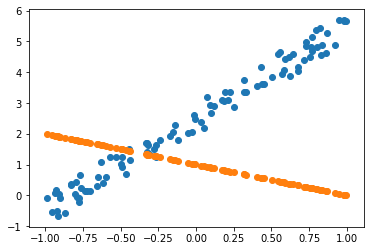

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

到现在我们已经指定了 *模型*  的类型（线性回归），以及 *评估标准* （或者说 *损失函数* ），接下来我们需要处理 *优化*  过程；即，我们如何才能找到最优的`a`呢？我们如何才能找到 *拟合*  最好的线性回归模型呢？

# Gradient Descent 梯度下降

We would like to find the values of `a` that minimize `mse_loss`.<br>

我们希望找到最小化`mse_loss`值的`a`的值。

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.<br>

**梯度下降** 是一个用于优化函数的算法。给定一个由一组参数决定的函数，梯度下降从一组初始的参数值开始，不断向能够最小化函数值的参数值迭代。这个迭代式最小化的结果是，通过向函数梯度的负方向不断递进而得到的。

Here is gradient descent implemented in [PyTorch](http://pytorch.org/). <br>

这里是 [PyTorch](http://pytorch.org/)中梯度下降算法实施的细节。

In [11]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [12]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): update()

tensor(8.3190, grad_fn=<MeanBackward0>)
tensor(1.3579, grad_fn=<MeanBackward0>)
tensor(0.3336, grad_fn=<MeanBackward0>)
tensor(0.1313, grad_fn=<MeanBackward0>)
tensor(0.0905, grad_fn=<MeanBackward0>)
tensor(0.0823, grad_fn=<MeanBackward0>)
tensor(0.0807, grad_fn=<MeanBackward0>)
tensor(0.0803, grad_fn=<MeanBackward0>)
tensor(0.0803, grad_fn=<MeanBackward0>)
tensor(0.0802, grad_fn=<MeanBackward0>)


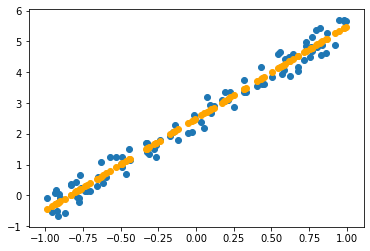

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a,c='orange');

## Animate it! 过程动画化

In [15]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y)
line, = plt.plot(x[:,0], x@a,c='orange')
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.<br>

实际上，我们并没有立刻计算整个数据集，相反，我们采用 *mini-batches（小批次）* 的策略。

## Vocab 术语

- Learning rate 学习率
- Epoch 轮次
- Minibatch 小批次
- SGD 随机梯度下降法
- Model / Architecture 模型/架构
- Parameters 参数
- Loss function 损失函数

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.<br>

对于分类问题，我们使用 *交叉熵损失* ，也被称为 *负对数似然损失* 。该损失函数将惩罚那些置信高的错误预测和置信低的正确预测。